In [1]:
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
import numpy as np
import glob
from tqdm import tqdm
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image


In [3]:
from sklearn.model_selection import train_test_split

## Loading Data


In [4]:
# For colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## To unzip images

# path_to_zip = "drive/MyDrive/img_align_celeba.zip"
# directory_to_extract_to = "drive/MyDrive/img_align_celeba"

# import zipfile
# with zipfile.ZipFile(path_to_zip, 'r') as zip_ref:
#     zip_ref.extractall(directory_to_extract_to)

In [7]:
# model = keras.applications.ResNet50()

102973440/102967424 [==============================] - 1s 0us/step


In [4]:
from tensorflow.keras import layers
import glob

In [7]:
attributes =  pd.read_csv("drive/MyDrive/list_attr_celeba.txt")
attributes.head()

,202599
0,5_o_Clock_Shadow Arched_Eyebrows Attractive Ba...
1,000001.jpg -1 1 1 -1 -1 -1 -1 -1 -1 -1 -1 1...
2,000002.jpg -1 -1 -1 1 -1 -1 -1 1 -1 -1 -1 1...
3,000003.jpg -1 -1 -1 -1 -1 -1 1 -1 -1 -1 1 -1...
4,000004.jpg -1 -1 1 -1 -1 -1 -1 -1 -1 -1 -1 -1...


In [13]:
images = glob.glob('drive/MyDrive/img_align_celeba/img_align_celeba/*.jpg')
len(images)

20661

In [14]:
# Not sure if Colab messages up the order of the images or not, so just in case
print(images.sort())

None


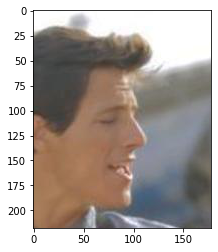

In [16]:
plt.imshow(mpimg.imread(images[2]))

In [15]:
x = []
size = 128
for i in tqdm(images[0:]):
  img = image.load_img(i, target_size=(size,size,3))
  img = image.img_to_array(img)
  x.append(img)

100%|██████████| 20661/20661 [01:09<00:00, 297.70it/s]


In [5]:
import csv 

save_path = "drive/MyDrive/input.csv"

In [20]:
# # Convert input into a csv for later use (just so it's faster to load images)

# with open(save_path, 'w') as f:
#   writer = csv.writer(f, delimiter=',')

#   for i, img in enumerate(x):
#     np_img = np.array(img)
#     reshaped_img = np_img.reshape(1, -1)
#     writer.writerow(reshaped_img[0])

#     if i % 5000 == 0:
#       print(i, end=' ') 

0 5000 10000 15000 20000 

In [6]:
# Load image data from csv to numpy array

size = 3000
x = np.zeros((size, 128, 128, 3)) # CNN requires input shape to be (#samples, width, height, channels)

with open(save_path, 'r') as f:
  for i, img in enumerate(f):
    vals = np.array([float(i) for i in img.split(",")])
    vals = vals.reshape(128, 128, 3)
    x[i,:,:,:] = vals
    # x.append(vals)

    if i % 5000 == 0:
      print(i, end=' ') 

    if i == size - 1:
      break

    # plt.imshow(vals.astype(np.uint8))
    # plt.show()

0 

In [1]:
## Convert list_attr_celeba.txt to csv file

# import csv 

# txt_file = "drive/MyDrive/list_attr_celeba.txt"
# csv_file = "drive/MyDrive/list_attr_celeba1.csv"

# with open(txt_file, 'r') as infile, open(csv_file, 'w') as outfile:
#   writer = csv.writer(outfile)

#   for i, line in enumerate(infile):
#     if 0 < i < 20664: 
#       attr = line.split(' ')
#       while '' in attr: attr.remove('')
#       attr[-1] = attr[-1].replace("\n", '')

#       if i == 1: attr.insert(0, 'img_num'); attr.pop()

#       writer.writerows([attr])

#       if i < 10: print(attr)

['img_num', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']
['000001.jpg', '-1', '1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '1', '1', '-1', '1', '-1', '-1', '1', '-1', '-1', '1', '-1', '-1', '-1', '1', '1', '-1', '1', '-1', '1', '-1', '-1', '1']
['000002.jpg', '-1', '-1', '-1', '1', '-1', '-1', '-1', '1', '-1', '-1', '-1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '1', '-1', '1', '-1', '-1', '1', '-1

In [73]:
print(attr)

['202599.jpg', '-1', '1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '1', '-1', '-1', '-1', '-1', '-1', '1', '-1', '1', '1', '-1', '-1', '-1', '-1', '-1', '1', '-1', '-1', '1', '-1', '-1', '1\n']


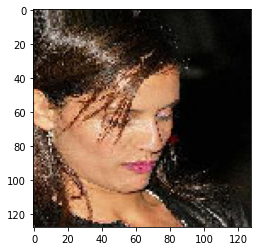

In [6]:
plt.imshow(x[3].astype(np.uint8))
plt.show()

In [7]:
csv_file = "drive/MyDrive/list_attr_celeba1.csv"
data = pd.read_csv(csv_file)

In [8]:
# Replace -1's to 0's so "Binary_Crossentropy" can be used

data = data.replace(-1, 0)

In [8]:
print(data)

          img_num  5_o_Clock_Shadow  ...  Wearing_Necktie  Young
0      000001.jpg                 0  ...                0      1
1      000002.jpg                 0  ...                0      1
2      000003.jpg                 0  ...                0      1
3      000004.jpg                 0  ...                0      1
4      000005.jpg                 0  ...                0      1
...           ...               ...  ...              ...    ...
20657  020658.jpg                 0  ...                0      1
20658  020659.jpg                 0  ...                0      1
20659  020660.jpg                 0  ...                0      1
20660  020661.jpg                 1  ...                0      1
20661  020662.jpg                 0  ...                0      1

[20662 rows x 41 columns]


## CNN for Binary Classification of one attribute. Black Hair was chosen for this. Only first 3000 samples were used to train/test.

In [9]:
# Creates the convolutional neural network
def create_model():
    model = keras.models.Sequential()

    # First layer of CNN with input layer
    model.add(keras.layers.Conv2D(32, (3, 3), input_shape=(128, 128, 3)))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    # Second layer of CNN
    model.add(keras.layers.Conv2D(64, (3, 3)))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    # Third layer of CNN
    model.add(keras.layers.Conv2D(128, (3, 3)))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    # Flatten the output and create fully connected layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(256))

    # Output layer with 1 different class
    model.add(keras.layers.Dense(1))
    model.add(keras.layers.Activation('sigmoid'))

    model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

    return model


In [11]:
x_data = x
y_data = data.iloc[:3000]

In [11]:
print(type(x_data))

<class 'numpy.ndarray'>


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data.Black_Hair, test_size=0.2, random_state = 1)

In [11]:
# # If data was loaded directly into x using the 
# # '''for i in tqdm(images[0:]):''' code,
# # we have to reshape for CNN input since 
# # it wants data in the shape of (#samples, width, height, channels)

# x_train = np.array(x_train)
# x_test = np.array(x_test)

# x_train = x_train.reshape(x_train.shape[0], 128, 128, 3)
# x_test = x_test.reshape(x_test.shape[0], 128, 128, 3)

In [13]:
model = create_model()
history = model.fit(x_train, y_train, epochs=8)

print('Model evaluation ', model.evaluate(x_test, y_test))

Epoch 1/8
75/75 [==============================] - 9s 18ms/step - loss: 271.2072 - accuracy: 0.6775
Epoch 2/8
75/75 [==============================] - 1s 18ms/step - loss: 0.5785 - accuracy: 0.7663
Epoch 3/8
75/75 [==============================] - 1s 18ms/step - loss: 0.5320 - accuracy: 0.7671
Epoch 4/8
75/75 [==============================] - 1s 18ms/step - loss: 0.5045 - accuracy: 0.7843
Epoch 5/8
75/75 [==============================] - 1s 18ms/step - loss: 0.5105 - accuracy: 0.7838
Epoch 6/8
75/75 [==============================] - 1s 18ms/step - loss: 0.4775 - accuracy: 0.7997
Epoch 7/8
75/75 [==============================] - 1s 18ms/step - loss: 0.4533 - accuracy: 0.8098
Epoch 8/8
19/19 [==============================] - 0s 9ms/step - loss: 0.5950 - accuracy: 0.7650
Model evaluation  [0.5950149893760681, 0.7649999856948853]


[[0.91200626]]
1


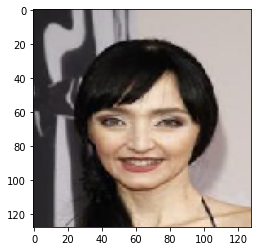

In [18]:
i = 22

test = x_test[i].reshape(1, 128, 128, 3)
print(model.predict(test))
print(y_test.iloc[i])
plt.imshow(x_test[i].astype(np.uint8))
plt.show()

## CNN for multilabel classication. Heavy_Makeup, High_Cheekbones, Male, and Mouth_Slightly_Open were used. Only first 3000 samples were used to train/test 

In [74]:
# Creates the convolutional neural network
def create_multi_label_model():
    model = keras.models.Sequential()

    # First layer of CNN with input layer
    model.add(keras.layers.Conv2D(32, (3, 3), input_shape=(128, 128, 3)))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    # Second layer of CNN
    model.add(keras.layers.Conv2D(64, (3, 3), padding='SAME'))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    # Third layer of CNN
    model.add(keras.layers.Conv2D(128, (3, 3), padding='SAME'))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    # Fourth layer of CNN
    model.add(keras.layers.Conv2D(256, (3, 3), padding='SAME'))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    # Flatten the output and create fully connected layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(512))
    model.add(keras.layers.Dense(1024))

    # Output layer with 1 different class
    model.add(keras.layers.Dense(4))
    model.add(keras.layers.Activation('sigmoid'))

    model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

    return model

In [77]:
x_data = x/255 # Testing out data normalization
y_data = data.iloc[:3000, 19:23]

In [78]:
print(y_data)

      Heavy_Makeup  High_Cheekbones  Male  Mouth_Slightly_Open
0                1                1     0                    1
1                0                1     0                    1
2                0                0     1                    0
3                0                0     0                    0
4                1                0     0                    0
...            ...              ...   ...                  ...
2995             1                1     0                    1
2996             1                1     0                    1
2997             1                1     0                    1
2998             0                1     0                    1
2999             1                1     0                    0

[3000 rows x 4 columns]


In [79]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state = 1)

In [80]:
model = create_multi_label_model()
history = model.fit(x_train, y_train, epochs=60)

y_predict = model.predict(x_test)
y_predict = y_predict.round()


Epoch 1/60
75/75 [==============================] - 2s 21ms/step - loss: 0.7801 - accuracy: 0.1477
Epoch 2/60
75/75 [==============================] - 1s 20ms/step - loss: 0.5881 - accuracy: 0.4995
Epoch 3/60
75/75 [==============================] - 1s 20ms/step - loss: 0.5016 - accuracy: 0.5579
Epoch 4/60
75/75 [==============================] - 2s 20ms/step - loss: 0.3695 - accuracy: 0.5755
Epoch 5/60
75/75 [==============================] - 1s 20ms/step - loss: 0.3105 - accuracy: 0.5371
Epoch 6/60
75/75 [==============================] - 1s 20ms/step - loss: 0.2943 - accuracy: 0.5903
Epoch 7/60
75/75 [==============================] - 1s 20ms/step - loss: 0.2633 - accuracy: 0.5350
Epoch 8/60
75/75 [==============================] - 2s 20ms/step - loss: 0.2287 - accuracy: 0.5611
Epoch 9/60
75/75 [==============================] - 1s 20ms/step - loss: 0.1944 - accuracy: 0.5674
Epoch 10/60
75/75 [==============================] - 2s 20ms/step - loss: 0.1709 - accuracy: 0.5663
Epoch 11/

In [86]:
i = 1

from sklearn.metrics import accuracy_score
print(y_test.iloc[i])
print(y_predict[i])
acc = accuracy_score(y_test, y_predict)
print(acc)

Heavy_Makeup           0
High_Cheekbones        1
Male                   1
Mouth_Slightly_Open    1
Name: 2087, dtype: int64
[0. 1. 1. 1.]
0.5233333333333333


## Visualize Data (Just a count of labels per attribute)

In [45]:
sums = data[:20661].sum(axis = 0, skipna = True)

In [46]:
pos = [sums[i] for i in range(1, len(sums))]

In [48]:
negs = [20661 - pos[i] for i in range(len(pos))]

In [58]:
categories = list(data.columns.values)[1:]

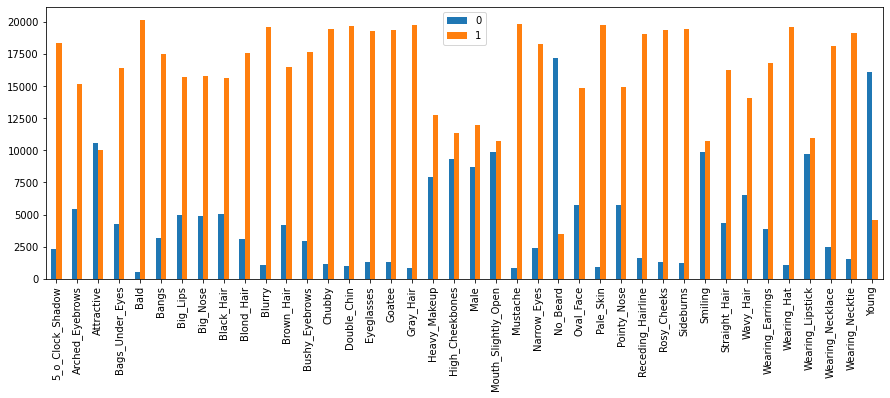

In [69]:
df = pd.DataFrame(np.c_[pos, negs], index=categories)
df.plot.bar(figsize=(15, 5))

plt.show()